In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import random
import numpy as np
import pandas as pd 
from skimage import io
from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras import optimizers


ModuleNotFoundError: No module named 'keras'

In [2]:
# getting one image per label
f, ax = plt.subplots(1,10, figsize = (120,120))
for i in range(10):
  #print('now we are in the folder C',i)
    labels = imread("/home/jupyter/TrainImages/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        label = i
        ax[i].imshow(img)
        ax[i].set_title('C'+str(i))
        plt.show


# After Editing
f, ax = plt.subplots(1,10, figsize = (120,120))
for i in range(10):
  #print('now we are in the folder C',i)
    labels = imread("/home/jupyter/TrainImages/train/c"+str(i)+"/*.jpg")
    for j in range(1):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-50]
        label = i
        ax[i].imshow(img,cmap='gray')
        ax[i].set_title('C'+str(i))
        plt.show


NameError: name 'plt' is not defined

In [5]:
train_image = []
image_label = []


for i in range(10):
    print('now we are in the folder C',i)
    labels = imread("/home/jupyter/TrainImages/train/c"+str(i)+"/*.jpg")
    for j in range(len(labels)):
  #for j in range(500):
        img = labels[j]
        img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img,(224,224))
        label = i
        train_image.append([img,label])
        image_label.append(i)   

now we are in the folder C 0
now we are in the folder C 1
now we are in the folder C 2
now we are in the folder C 3
now we are in the folder C 4
now we are in the folder C 5
now we are in the folder C 6
now we are in the folder C 7
now we are in the folder C 8
now we are in the folder C 9


In [12]:
## Randomly shuffling the images

import random
random.shuffle(train_image)

In [13]:
## Splitting the image and label to two different lists

X = []
Y = []
for features,labels in train_image:
    X.append(features)
    Y.append(labels)

print (len(X), len(Y))

22424 22424


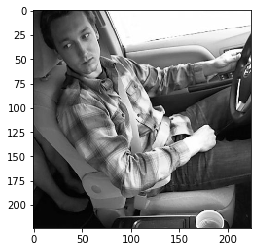

9


In [18]:
plt.imshow(X[5],cmap= 'gray')
plt.show()
print(Y[5])

In [19]:
## Converting images to nparray. Encoding the Y

X = np.array(X).reshape(-1,224,224,1)
Y = to_categorical(Y)

# X2 = cv2.merge([X,X,X])
# X2 = np.array(X2).reshape(-1,224,224,3)
# print (X2.shape)
print (X.shape)

(22424, 224, 224, 1)


In [25]:
print(Y[5])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [26]:
## Designing the Layers
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [30]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224,224,1),padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size = (3,3),activation = 'relu',padding = 'same'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))


model.add(Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])


In [31]:
## Fitting the model

model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Train on 17939 samples, validate on 4485 samples
Epoch 1/3
17939/17939 [==============================] - 45s 3ms/step - loss: 0.2759 - acc: 0.9226 - val_loss: 0.0268 - val_acc: 0.9960
Epoch 2/3
17939/17939 [==============================] - 43s 2ms/step - loss: 0.0078 - acc: 0.9993 - val_loss: 0.0205 - val_acc: 0.9946
Epoch 3/3
17939/17939 [==============================] - 43s 2ms/step - loss: 0.0034 - acc: 0.9999 - val_loss: 0.0140 - val_acc: 0.9969


Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9


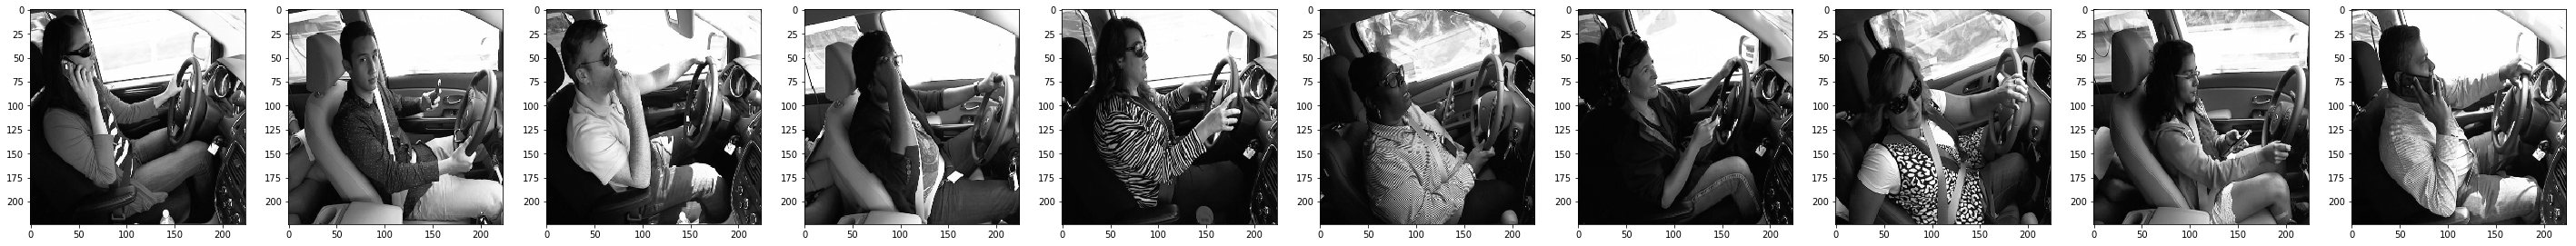

In [56]:
# labels is the image array
test_image = []
i = 0
fig, ax = plt.subplots(1, 10, figsize = (50,50 ))

files = os.listdir('/home/jupyter/TestImages')
nums = np.random.randint(low=1, high=len(files), size=10)
for i in range(10):
    print ('Image number:',i)
    img = cv2.imread('/home/jupyter/TestImages/'+files[nums[i]])
    img = color.rgb2gray(img)
    #img = img[100:,300:-50]
    img = cv2.resize(img,(224,224))
    test_image.append(img)
    ax[i].imshow(img,cmap = 'gray')
    plt.show


In [57]:
test = []

for img in test_image:
    test.append(img)

test = np.array(test).reshape(-1,224,224,1)
prediction = model.predict(test)

In [58]:
prediction[0]

array([0.12118118, 0.02372572, 0.7197738 , 0.00774842, 0.00954521,
       0.01095317, 0.00073767, 0.01044698, 0.02446795, 0.07141986],
      dtype=float32)

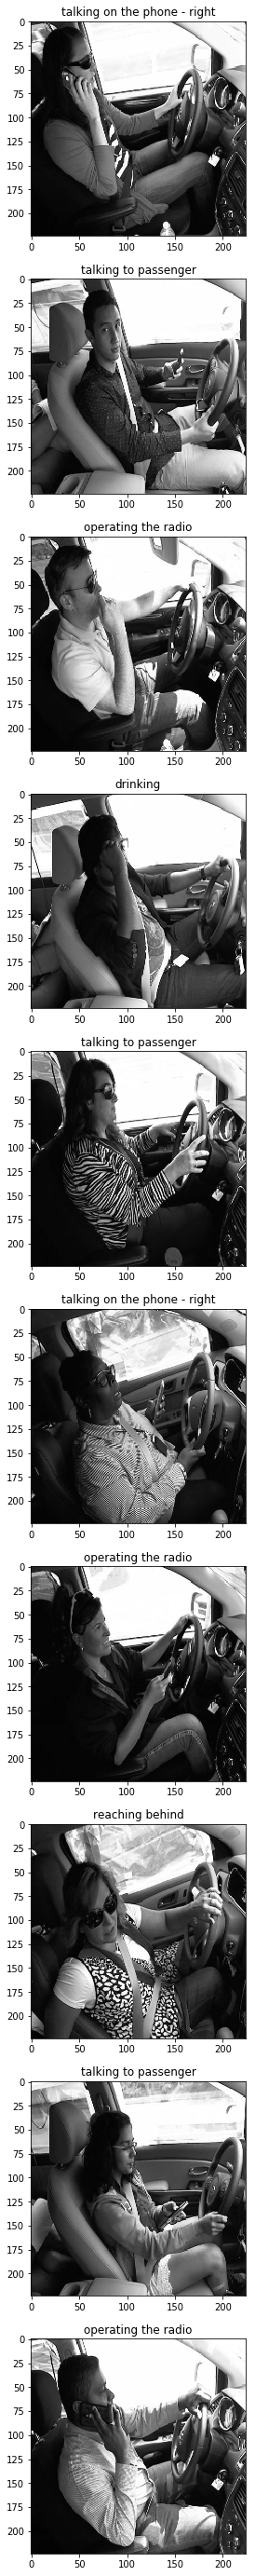

In [59]:
# labels is the image array
i = 0
fig, ax = plt.subplots(10, 1, figsize = (50,50 ))

for i in range(10):
    ax[i].imshow(test[i].squeeze(),cmap = 'gray')
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show
    


In [49]:
tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }